In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns



## MODEL FOR RATE OF HOUSE PREDICITION

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'data/USA_Housing.csv')

FileNotFoundError: [Errno 2] File data/USA_Housing.csv does not exist: 'data/USA_Housing.csv'

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe(include='all')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"270 Sarah Vista\nNorth Jessicatown, MP 84920-3221"
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN


# <b>Problem Statement: PREDICT THE PRICE</b>

In [3]:
sns.pairplot(df)

NameError: name 'df' is not defined

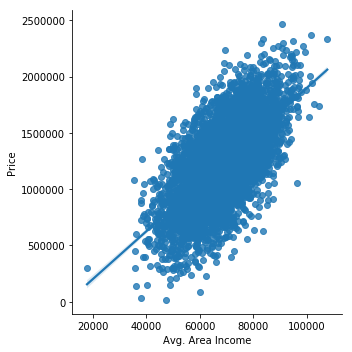

In [13]:
sns.lmplot(x='Avg. Area Income', y='Price', data=df)

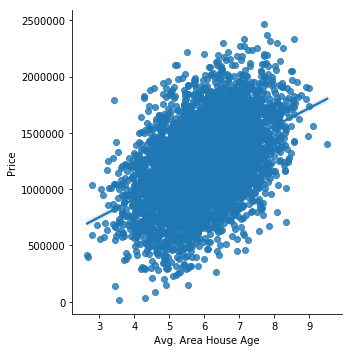

In [14]:
sns.lmplot(x='Avg. Area House Age', y='Price', data=df)

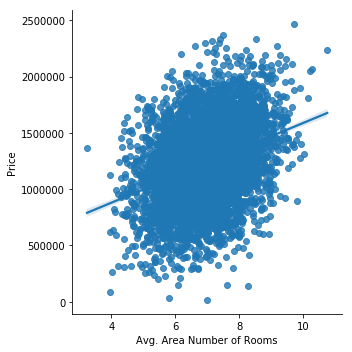

In [15]:
sns.lmplot(x='Avg. Area Number of Rooms', y='Price', data=df)

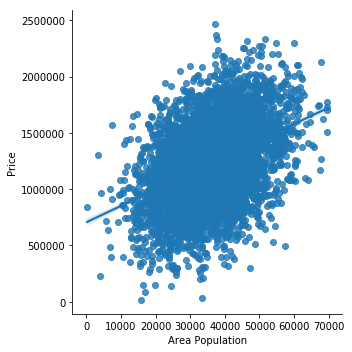

In [17]:
sns.lmplot(x='Area Population', y='Price', data=df)

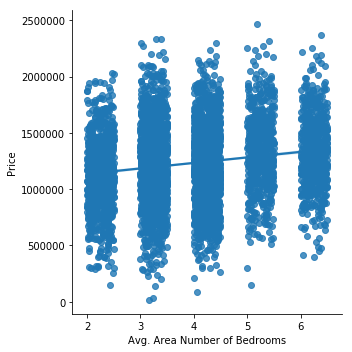

In [29]:
sns.lmplot(x='Avg. Area Number of Bedrooms', y='Price', data=df)

In [27]:
# sns.jointplot(x='Area Population', y='Price', data=df, kind='reg')

In [28]:
# jg = sns.JointGrid(x='Area Population', y='Price', data=df)
# jg.plot(sns.regplot, sns.kdeplot)

In [30]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [31]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y = df['Price']

In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [33]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 2654 to 4959
Data columns (total 4 columns):
Avg. Area Income             3500 non-null float64
Avg. Area House Age          3500 non-null float64
Avg. Area Number of Rooms    3500 non-null float64
Area Population              3500 non-null float64
dtypes: float64(4)
memory usage: 136.7 KB


In [34]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1718 to 790
Data columns (total 4 columns):
Avg. Area Income             1500 non-null float64
Avg. Area House Age          1500 non-null float64
Avg. Area Number of Rooms    1500 non-null float64
Area Population              1500 non-null float64
dtypes: float64(4)
memory usage: 58.6 KB


In [36]:
ytest.size

1500

In [37]:
ytrain.size

3500

#### Model Creation & Training

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression().fit(xtrain,ytrain)

#### Model Evaluation

In [40]:
ypred = model.predict(xtest)

In [41]:
ypred

array([1259058.03220781,  820045.95304558, 1744062.72530909, ...,
       1454578.44065255,  646846.44421705, 1362583.2472792 ])

In [42]:
ytest

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
3412    7.043759e+05
4020    1.254938e+06
4635    1.434324e+06
1700    5.340775e+05
790     1.427202e+06
Name: Price, Length: 1500, dtype: float64

##### <b>R2 Score</b>

In [53]:
print("%0.2f"%(model.score(xtest,ytest)*100),'%')

91.85 %


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
print('MAE:',mean_absolute_error(ytest,ypred))
print('MSE:',mean_squared_error(ytest,ypred))
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypred)))

MAE: 81268.89606138287
MSE: 10174437569.110308
RMSE: 100868.41710421705


In [54]:
100*81000/2400000

3.375

In [55]:
100*81000/1200000

6.75

#### Save the Model

In [56]:
pd.to_pickle(model,'HousingModel')

#### Whenever required, load that model

In [57]:
m = pd.read_pickle('HousingModel')

In [58]:
m

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']

In [62]:
d = {i:[eval(input('Enter '+i+': '))] for i in cols}

Enter Avg. Area Income:  65000
Enter Avg. Area House Age:  7
Enter Avg. Area Number of Rooms:  6
Enter Area Population:  35000


In [63]:
d

{'Area Population': [35000],
 'Avg. Area House Age': [7],
 'Avg. Area Income': [65000],
 'Avg. Area Number of Rooms': [6]}

In [64]:
queryData = pd.DataFrame(d)

In [65]:
queryData

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,65000,7,6,35000


In [66]:
result = m.predict(queryData)[0]

In [67]:
result

1186177.1976167774

In [68]:
print('You can sell your house in approx USD %d'%result)

You can sell your house in approx USD 1186177
